In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/data/programs/auto_alignment_bubble_segmentation/program')
import os
import glob

import tifffile
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

import autobl.analysis.segmentation

In [3]:
def preprocess(img):
    if img.ndim == 3:
        img = rgb2gray(img)
    return img

In [4]:
img = tifffile.imread('data/raw/cell_bw_1s_000.tif')
# img = tifffile.imread('data/raw/cell_color_1s_000.tif')
# flist = glob.glob('/home/8ididata/CCD_Test/*0p015*.tif')
# print(flist)
# img = tifffile.imread(flist[0])
img = preprocess(img)

In [5]:
segmentor = autobl.analysis.segmentation.BubbleSegmentor(downsample=4)
segmentor.set_camera_image(img)
scannable_mask = segmentor.run(return_original_scale=False)
cell_window_mask = segmentor.cell_window_mask
img_ds = segmentor.image

100%|█████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 122.31it/s]


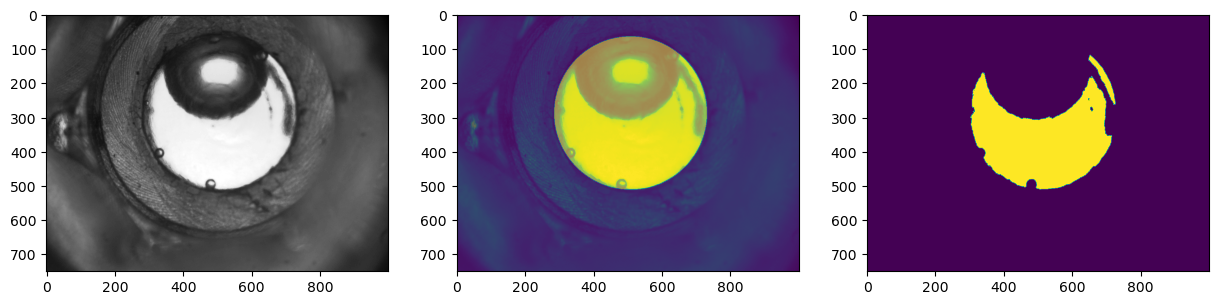

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_ds, cmap='gray')
ax[1].imshow(img_ds)
ax[1].imshow(cell_window_mask, alpha=0.5)
ax[2].imshow(scannable_mask, alpha=1)
plt.show()

In [7]:
flist = glob.glob('/home/8ididata/CCD_Test/*0p015*.tif')
print(flist)
img = tifffile.imread(flist[1])
img = preprocess(img)

['/home/8ididata/CCD_Test/cell_bw_0p015_000.tif', '/home/8ididata/CCD_Test/capillaryl_bw_0p015_000.tif']


In [8]:
segmentor = autobl.analysis.segmentation.CapillarySegmentor(downsample=4)
segmentor.set_camera_image(img)
scannable_mask = segmentor.run(return_original_scale=False)
img_ds = segmentor.image

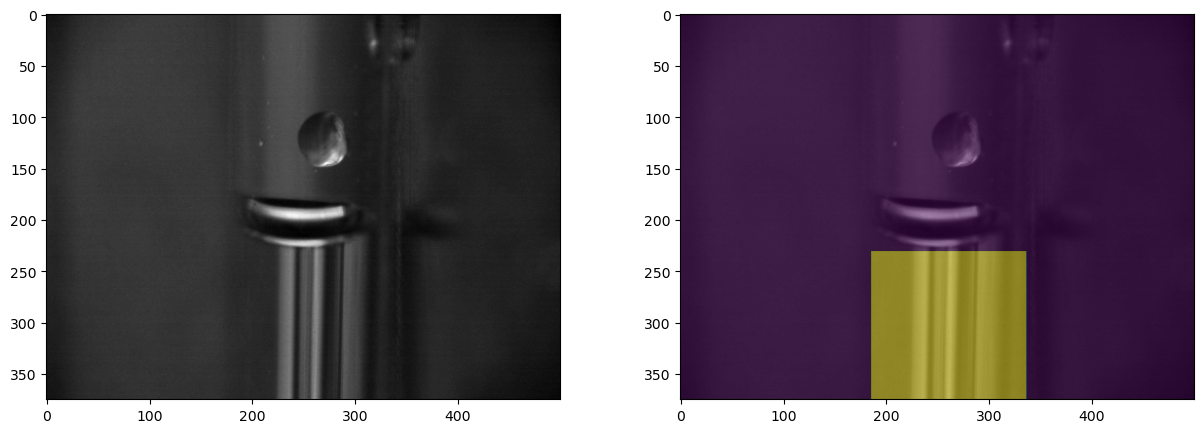

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_ds, cmap='gray')
ax[1].imshow(img_ds, cmap='gray', alpha=1)
ax[1].imshow(scannable_mask, alpha=0.5)
plt.show()